### **Controllable Generation using GANs with CelebA Dataset**
![CelebA](https://mmlab.ie.cuhk.edu.hk/projects/CelebA/intro.png)

**Importing Libraries**

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython import display
from tqdm import tqdm
import urllib
import zipfile
import glob
import pandas as pd
from PIL import Image
import imageio.v2 as imageio

**Load Data**

In [2]:
data_url="https://storage.googleapis.com/learning-datasets/Resources/archive.zip"
data_file_name="archive.zip"
download_dir="/content/celeb/"
urllib.request.urlretrieve(data_url, data_file_name)

zip_ref = zipfile.ZipFile(data_file_name, "r")
zip_ref.extractall(download_dir)
zip_ref.close()

In [3]:
image_paths=np.array(sorted(glob.glob("/content/celeb/img_align_celeba/img_align_celeba/*.jpg")))
image_paths.shape

(202599,)

In [4]:
image_paths[[0, 1, 2, -3, -2, -1]]

array(['/content/celeb/img_align_celeba/img_align_celeba/000001.jpg',
       '/content/celeb/img_align_celeba/img_align_celeba/000002.jpg',
       '/content/celeb/img_align_celeba/img_align_celeba/000003.jpg',
       '/content/celeb/img_align_celeba/img_align_celeba/202597.jpg',
       '/content/celeb/img_align_celeba/img_align_celeba/202598.jpg',
       '/content/celeb/img_align_celeba/img_align_celeba/202599.jpg'],
      dtype='<U59')

In [5]:
df_labels=pd.read_csv("/content/celeb/list_attr_celeba.csv")
df_labels[df_labels.columns[1:]]=df_labels[df_labels.columns[1:]].replace(-1, 0)
df_labels=df_labels.sort_values(by="image_id")
df_labels

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                 0                1           1   
1       000002.jpg                 0                0           0   
2       000003.jpg                 0                0           0   
3       000004.jpg                 0                0           1   
4       000005.jpg                 0                1           1   
...            ...               ...              ...         ...   
202594  202595.jpg                 0                0           1   
202595  202596.jpg                 0                0           0   
202596  202597.jpg                 0                0           0   
202597  202598.jpg                 0                1           1   
202598  202599.jpg                 0                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
0                     0     0      0         0         0           0  ...   
1                     1     0      0         0         1           0  ...   
2                     0     0      0         1         0           0  ...   
3                     0     0      0         0         0           0  ...   
4                     0     0      0         1         0           0  ...   
...                 ...   ...    ...       ...       ...         ...  ...   
202594                0     0      0         1         0           0  ...   
202595                0     0      1         1         0           0  ...   
202596                0     0      0         0         0           1  ...   
202597                0     0      0         1         0           1  ...   
202598                0     0      0         0         0           0  ...   

        Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
0               0        1              1          0                 1   
1               0        1              0          0                 0   
2               0        0              0          1                 0   
3               0        0              1          0                 1   
4               0        0              0          0                 0   
...           ...      ...            ...        ...               ...   
202594          0        0              0          0                 0   
202595          0        1              1          0                 0   
202596          0        1              0          0                 0   
202597          0        1              0          1                 1   
202598          0        0              0          1                 0   

        Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
0                 0                 1                 0                0   
1                 0                 0                 0                0   
2                 0                 0                 0                0   
3                 0                 1                 1                0   
4                 0                 1                 0                0   
...             ...               ...               ...              ...   
202594            0                 1                 0                0   
202595            0                 0                 0                0   
202596            0                 0                 0                0   
202597            0                 1                 0                0   
202598            0                 1                 0                0   

        Young  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
202594      1  
202595      1  
202596      1  
202597      1  
202598      1  

[202599 rows x 41 columns]

In [6]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [7]:
label_names=df_labels.columns[1:].tolist()
num_classes=len(label_names)
print(num_classes)
label_names

40


['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

In [8]:
data_labels=df_labels.iloc[:, 1:].values
data_labels.shape

(202599, 40)

In [28]:
batch_size=128
buffer_size=1024
epochs=10
resize=(64, 64)
z_dim=128

In [10]:
def data_processing(path, label, resize=resize):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  #img = tf.image.central_crop(img, central_fraction=0.8)  #Works better without central_crop
  img = tf.image.resize(img, resize, method="bicubic", antialias=True)
  img = tf.cast(img, tf.float32)/127.5 -1

  label=tf.cast(label, tf.float32)

  return img, label

In [11]:
train_dataset=tf.data.Dataset.from_tensor_slices((image_paths, data_labels))
train_dataset = (train_dataset
                 .map(lambda x, y: data_processing(x, y, resize))
                 .shuffle(buffer_size, seed=123)
                 .batch(batch_size)
                 .prefetch(tf.data.AUTOTUNE))

In [12]:
for images, labels in train_dataset.take(1):
  print(images.shape, labels.shape)

(128, 64, 64, 3) (128, 40)


In [13]:
labels[0]

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)>

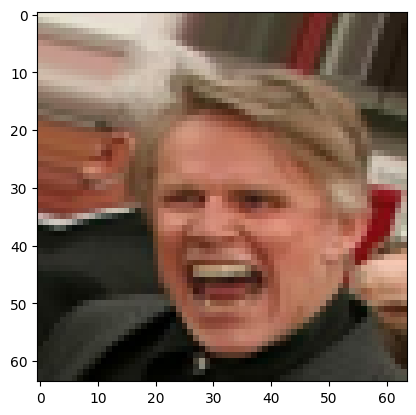

In [14]:
plt.imshow(tf.cast((images[0]+1) * 127.5, tf.uint8));

### **Train the Classifier**

In [ ]:
tf.keras.backend.clear_session()

In [15]:
def model_classifier(num_classes=num_classes, use_bias=True):
  input=tf.keras.Input(shape=(64, 64, 3))
  x=tf.keras.layers.Conv2D(64, (4,4), strides=2, padding="same", use_bias=use_bias)(input)
  x=tf.keras.layers.LeakyReLU(0.2)(x)

  x=tf.keras.layers.Conv2D(128, (4,4), strides=2, padding="same", use_bias=use_bias)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.LeakyReLU(0.2)(x)

  x=tf.keras.layers.Conv2D(256, (4,4), strides=2, padding="same", use_bias=use_bias)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.LeakyReLU(0.2)(x)

  x=tf.keras.layers.Conv2D(512, (4,4), strides=2, padding="same", use_bias=use_bias)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.LeakyReLU(0.2)(x)

  x=tf.keras.layers.Conv2D(num_classes, (4,4), strides=1, padding="valid", use_bias=use_bias)(x)
  x=tf.keras.layers.Flatten()(x)

  model=tf.keras.Model(inputs=input, outputs=x, name="classifier")

  return model

In [ ]:
classifier=model_classifier()
classifier.summary()

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 batch_normalization (Batch  (None, 16, 16, 128)       512       
 Normalization)                                                  
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                        

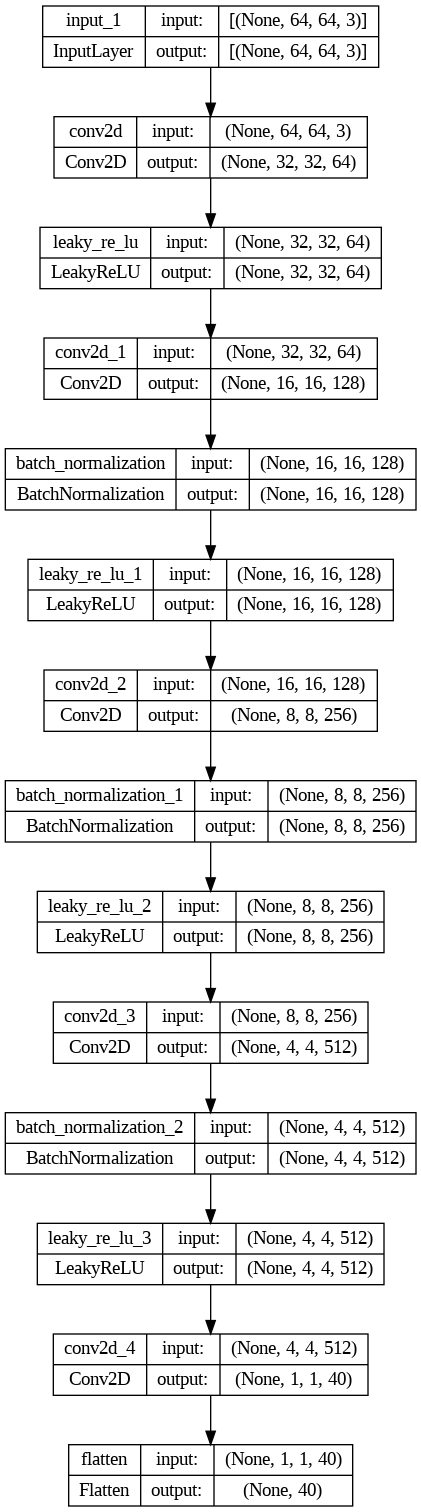

In [ ]:
tf.keras.utils.plot_model(classifier, show_shapes=True, show_layer_names=True)

In [ ]:
def accuracy(y_true, y_pred):
  y_pred=tf.math.sigmoid(y_pred)
  y_pred=tf.cast(y_pred>=0.5, dtype=tf.float32)
  accuracy=tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))
  return accuracy

In [ ]:
class_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
class_loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)

classifier.compile(optimizer=class_optimizer, loss=class_loss, metrics=[accuracy])

In [ ]:
tf.random.set_seed(123)

history=classifier.fit(train_dataset, epochs=epochs, verbose=1)

Epoch 1/10
1583/1583 [==============================] - 194s 117ms/step - loss: 0.2543 - accuracy: 0.8884
Epoch 2/10
1583/1583 [==============================] - 179s 113ms/step - loss: 0.2217 - accuracy: 0.9022
Epoch 3/10
1583/1583 [==============================] - 181s 114ms/step - loss: 0.2088 - accuracy: 0.9080
Epoch 4/10
1583/1583 [==============================] - 174s 109ms/step - loss: 0.1987 - accuracy: 0.9126
Epoch 5/10
1583/1583 [==============================] - 180s 113ms/step - loss: 0.1892 - accuracy: 0.9172
Epoch 6/10
1583/1583 [==============================] - 184s 116ms/step - loss: 0.1799 - accuracy: 0.9217
Epoch 7/10
1583/1583 [==============================] - 185s 116ms/step - loss: 0.1708 - accuracy: 0.9261
Epoch 8/10
1583/1583 [==============================] - 184s 116ms/step - loss: 0.1618 - accuracy: 0.9305
Epoch 9/10
1583/1583 [==============================] - 184s 116ms/step - loss: 0.1529 - accuracy: 0.9348
Epoch 10/10
1583/1583 [=======================

In [ ]:
# Display function

def plot_metrics(metric="loss", color="blue"):
  values=history.history[metric]
  list_epochs=np.arange(1, epochs+1)

  fig=go.Figure()
  fig.add_trace(go.Scatter(x=list_epochs, y=values, name="Train", line=dict(color=color, width=2)))
  fig.update_xaxes(title_text="Epoch")
  fig.update_yaxes(title_text=metric.capitalize())
  fig.update_layout(title=f"<b>Evolution of {metric.capitalize()} Across Iterations</b>",
                    title_font=dict(size=20),
                    title_x=0.5,
                    height=500,
                    width=1200)
  fig.show()

In [ ]:
plot_metrics()

In [ ]:
plot_metrics("accuracy", "red")

In [ ]:
!mkdir /content/models/

In [ ]:
# Save complete model

classifier.save("/content/models/model_classifier.keras")

You could also save only the model weights:

``classifier.save_weights("/content/models/model_classifier.h5")``


### **Train the Generator**

In [16]:
# Display functions

def make_grid(images, num_examples, nrow):
  images=tf.unstack(images[:num_examples], axis=0)
  images=tf.concat(images, axis=1)
  images=tf.split(images, nrow, axis=1)
  images=tf.concat(images, axis=0)

  return images

def show_and_save_images(real_images, fake_images, epoch, images_gif_size, num_examples=25, nrow=5, cmap="gray"):

  real_images=make_grid(real_images, num_examples, nrow)
  fake_images=make_grid(fake_images, num_examples, nrow)
  real_images = tf.cast((real_images+1) * 127.5, tf.uint8) # Denormalization
  fake_images = tf.cast((fake_images+1) * 127.5, tf.uint8)

  save_images = fake_images.numpy()
  save_images = Image.fromarray(save_images)
  save_images = save_images.resize(images_gif_size[:-1])
  save_images.save(f"images/image_at_epoch_{epoch:02d}.png")

  fig, ax = plt.subplots(1, 2, figsize=(nrow*2, nrow*2))
  ax[0].imshow(fake_images, cmap=cmap)
  ax[0].axis("off")
  ax[0].set_title("Generated Images")

  ax[1].imshow(real_images, cmap=cmap)
  ax[1].axis("off")
  ax[1].set_title("Real Images")

  plt.show()

In [17]:
# Function to graph losses

def plot_metrics(history, epochs=epochs):
  gen_losses=history["gen_loss"]
  disc_losses=history["disc_loss"]
  list_epochs=np.arange(1, epochs+1)

  fig=go.Figure()
  fig.add_trace(go.Scatter(x=list_epochs, y=gen_losses, name="Generator Loss", line=dict(color="blue", width=2)))
  fig.add_trace(go.Scatter(x=list_epochs, y=disc_losses, name="Discriminator Loss", line=dict(color="#FF6600", width=2)))
  fig.update_xaxes(title_text="Epoch")
  fig.update_yaxes(title_text="Loss")
  fig.update_layout(title=f"<b>Evolution of Loss across Epochs</b>",
                    title_font=dict(size=20),
                    title_x=0.5,
                    height=500,
                    width=1200)
  fig.show()

In [18]:
tf.keras.backend.clear_session()

In [19]:
def model_generator(z_dim=z_dim):
  input=tf.keras.Input(shape=(1, 1, z_dim))
  x=tf.keras.layers.Conv2DTranspose(512, (4,4), strides=1, padding="valid", use_bias=False)(input)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.ReLU()(x)

  x=tf.keras.layers.Conv2DTranspose(256, (4,4), strides=2, padding="same", use_bias=False)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.ReLU()(x)

  x=tf.keras.layers.Conv2DTranspose(128, (4,4), strides=2, padding="same", use_bias=False)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.ReLU()(x)

  x=tf.keras.layers.Conv2DTranspose(64, (4,4), strides=2, padding="same", use_bias=False)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.ReLU()(x)

  x=tf.keras.layers.Conv2DTranspose(3, (4,4), strides=2, padding="same", activation="tanh", use_bias=False)(x)

  model=tf.keras.Model(inputs=input, outputs=x, name="generator")

  return model

In [20]:
generator=model_generator()
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1, 128)]       0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 4, 4, 512)         1048576   
 anspose)                                                        
                                                                 
 batch_normalization (Batch  (None, 4, 4, 512)         2048      
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 4, 4, 512)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 8, 8, 256)         2097152   
 Transpose)                                                      
                                                         

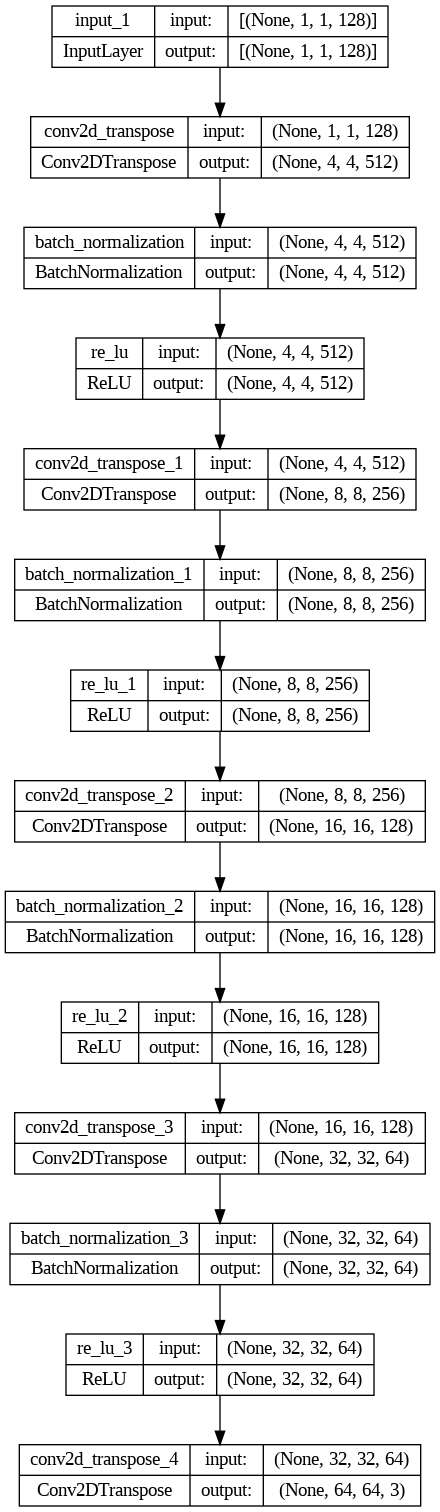

In [21]:
tf.keras.utils.plot_model(generator, show_shapes=True, show_layer_names=True)

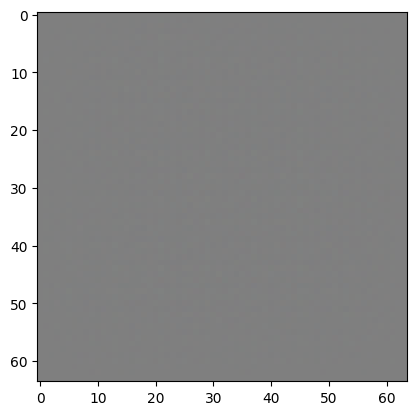

In [22]:
noise=tf.random.normal(shape=(1, 1, 1, z_dim))
fake_image=generator(noise, training=False)
plt.imshow(tf.cast((fake_image[0]+1) * 127.5, tf.uint8));

In [23]:
# The architecture is similar to that of the classifier

discriminator=model_classifier(num_classes=1, use_bias=False)
discriminator.summary()

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        3072      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131072    
                                                                 
 batch_normalization_4 (Bat  (None, 16, 16, 128)       512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                        

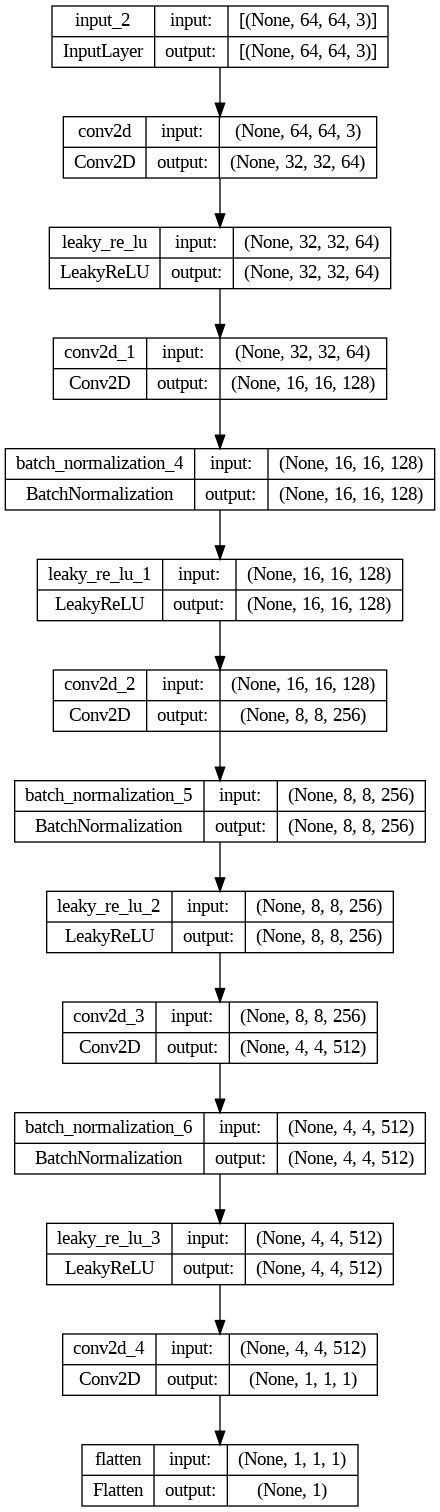

In [24]:
tf.keras.utils.plot_model(discriminator, show_shapes=True, show_layer_names=True)

In [25]:
fake_out=discriminator(fake_image, training=False)
fake_out

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.087736e-05]], dtype=float32)>

In [26]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
loss_model = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [27]:
@tf.function
def train_step(real_images):
  cur_batch_size=len(real_images)
  noise=tf.random.normal(shape=(cur_batch_size, 1, 1, z_dim))

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    fake_images=generator(noise, training=True)

    real_out=discriminator(real_images, training=True)
    fake_out=discriminator(fake_images, training=True)

    # Generator Loss
    gen_loss=loss_model(tf.ones_like(fake_out), fake_out)

    # Discriminator Loss
    real_loss=loss_model(tf.ones_like(real_out), real_out)
    fake_loss=loss_model(tf.zeros_like(fake_out), fake_out)
    disc_loss = (fake_loss+real_loss) / 2

  gradients_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_discriminator, discriminator.trainable_variables))

  return gen_loss, disc_loss

In [ ]:
# Delete image folder if it exists
!rm -r images
# Create image folder
!mkdir images

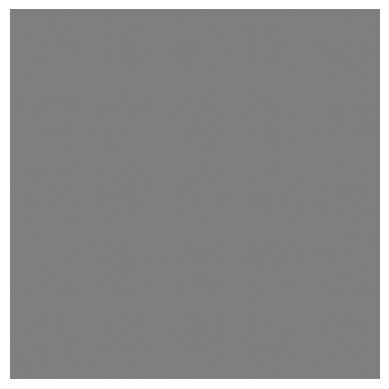

In [29]:
num_examples = 25
nrow = 5

noise = tf.random.normal((num_examples, 1, 1, z_dim))
fake_images = generator(noise, training=False)
fake_images = make_grid(fake_images, num_examples, nrow)
fake_images = tf.cast((fake_images+1) * 127.5, tf.uint8) # Denormalization

# Epoch 0 image
save_images = fake_images.numpy()
images_gif_size = save_images.shape
save_images = Image.fromarray(save_images)
save_images = save_images.resize(images_gif_size[:-1])
save_images.save(f"images/image_at_epoch_{0:02d}.png")

plt.imshow(fake_images)
plt.axis("off");

In [30]:
images_gif_size

(320, 320, 3)

In [31]:
epochs=15

In [32]:
def train_gan(epochs=epochs, num_examples=num_examples, nrow=nrow, images_gif_size=images_gif_size, display_wait=False):
  history={"gen_loss":[], "disc_loss":[]}

  for epoch in range(epochs):
    gen_loss_list, disc_loss_list = [], []

    with tqdm(train_dataset) as pbar:
      pbar.set_description(f"[Epoch: {epoch+1}/{epochs}]")
      for real_images, _ in pbar:
        gen_loss, disc_loss = train_step(real_images)

        gen_loss_list.append(gen_loss.numpy())
        disc_loss_list.append(disc_loss.numpy())

        pbar.set_postfix({"gen_loss": gen_loss.numpy(), "disc_loss": disc_loss.numpy()})

    gen_loss_mean = np.mean(gen_loss_list)
    disc_loss_mean = np.mean(disc_loss_list)
    history["gen_loss"].append(gen_loss_mean)
    history["disc_loss"].append(disc_loss_mean)

    display.clear_output(wait=display_wait)
    print(f"Epoch {epoch+1}, GeneratorLoss: {gen_loss_mean}, DiscriminatorLoss: {disc_loss_mean}")
    fake_images=generator(noise, training=False)

    show_and_save_images(real_images, fake_images, epoch+1, images_gif_size, num_examples, nrow)

  return history

Epoch 15, GeneratorLoss: 3.718290090560913, DiscriminatorLoss: 0.15586112439632416


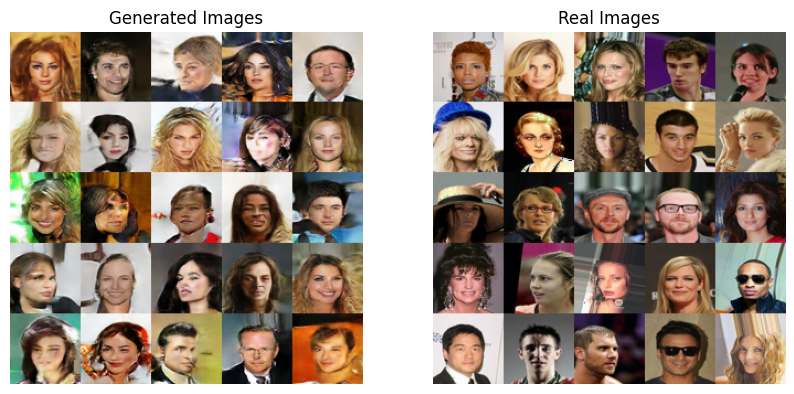

In [33]:
tf.random.set_seed(123)

history = train_gan()

In [34]:
# Interactive graphic
plot_metrics(history, epochs=epochs)

In [ ]:
!mkdir /content/models/

In [35]:
# Save complete model

generator.save("/content/models/model_generator.keras")

**Create a GIF from the generated images**

In [36]:
gif_file = "CelebA_DCGAN.gif"
images_file = "images"

In [46]:
def create_gif(gif_file, images_file):
  with imageio.get_writer(gif_file, mode="I") as writer:
    filenames = sorted(glob.glob(f"{images_file}/*.png"))
    for filename in filenames:
      image = imageio.imread(filename)
      writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

In [38]:
create_gif(gif_file, images_file)

In [24]:
!pip install tensorflow_docs

import tensorflow_docs.vis.embed as embed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 1.8 MB/s eta 0:00:00



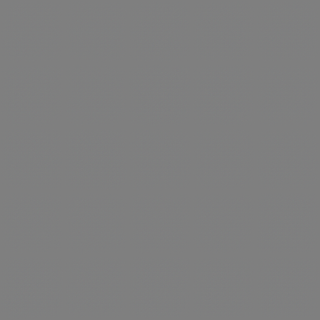

In [40]:
embed.embed_file(gif_file)

**Generated Example**

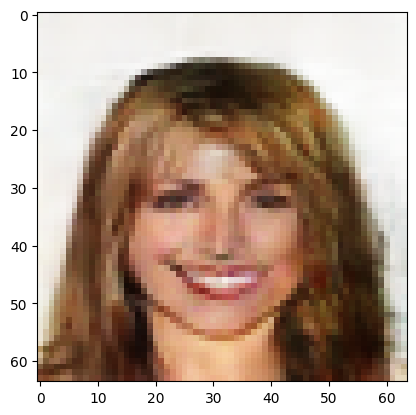

In [60]:
noise=tf.random.normal(shape=(1, 1, 1, z_dim))
fake_image=generator(noise)
plt.imshow(tf.cast((fake_image[0]+1) * 127.5, tf.uint8));

#### **Controllable Generation**

Load training models

In [14]:
tf.keras.backend.clear_session()

In [15]:
def accuracy(y_true, y_pred):
  y_pred=tf.math.sigmoid(y_pred)
  y_pred=tf.cast(y_pred>=0.5, dtype=tf.float32)
  accuracy=tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))
  return accuracy

In [16]:
classifier=tf.keras.models.load_model("/content/models/model_classifier.keras",
                                      custom_objects={"accuracy":accuracy})
classifier.summary()

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 batch_normalization (Batch  (None, 16, 16, 128)       512       
 Normalization)                                                  
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                        

In [18]:
generator=tf.keras.models.load_model("/content/models/model_generator.keras")
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1, 128)]       0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 4, 4, 512)         1048576   
 anspose)                                                        
                                                                 
 batch_normalization (Batch  (None, 4, 4, 512)         2048      
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 4, 4, 512)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 8, 8, 256)         2097152   
 Transpose)                                                      
                                                         

In [19]:
label_names

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

In [20]:
def show_images(images, num_images=25, nrow=3):
  images=tf.cast((images+1) * 127.5, tf.uint8)
  images=make_grid(images, num_images, nrow)

  plt.figure(figsize=(nrow*2, nrow*2))
  plt.imshow(images)
  plt.axis("off")
  plt.show()

def calculate_updated_noise(noise, grads, weight):
  new_noise = noise + grads * weight
  return new_noise

In [21]:
num_images=8
grad_steps=10
skip=2

In [67]:
def show_cont_generation(feature="Smiling", num_images=num_images, grad_steps=grad_steps, skip=skip, return_images=False):
  fake_images_history=[]
  target_index=label_names.index(feature)
  noise=tf.random.normal(shape=(num_images, 1, 1, z_dim))

  for i in range(grad_steps):
    with tf.GradientTape() as tape:
      tape.watch(noise)
      fake_image=generator(noise, training=False)
      fake_images_history.append(fake_image)
      fake_classes_score=tf.reduce_mean(classifier(fake_image, training=False)[:, target_index])

    grads=tape.gradient(fake_classes_score, noise)
    noise=calculate_updated_noise(noise, grads, 1/grad_steps)

  if return_images:
    return fake_images_history
  else:
    show_images(tf.concat(fake_images_history[::skip], axis=0),
                num_images=num_images*grad_steps//skip,
                nrow=grad_steps//skip)

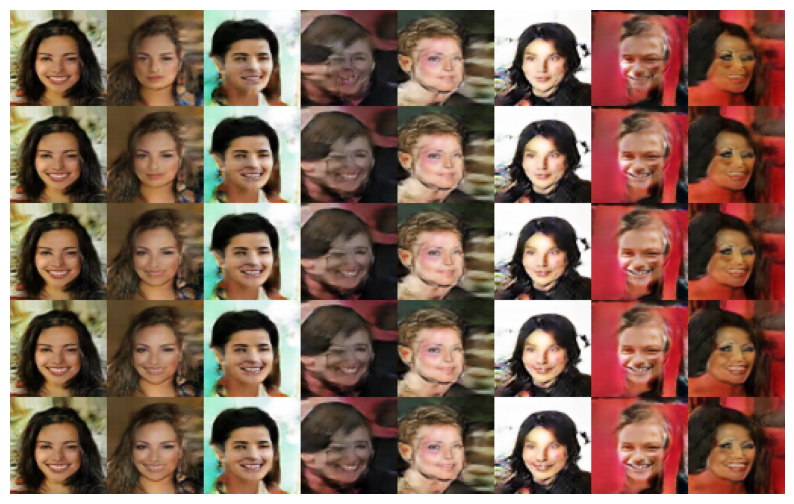

In [144]:
show_cont_generation()

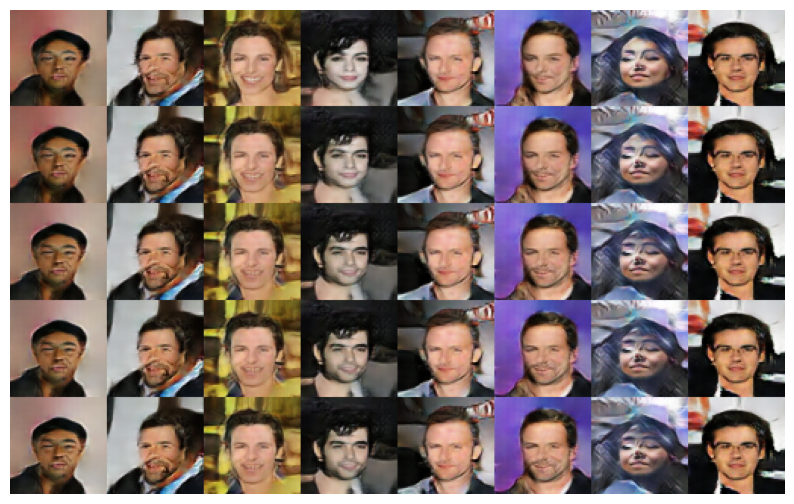

In [130]:
show_cont_generation("Male")

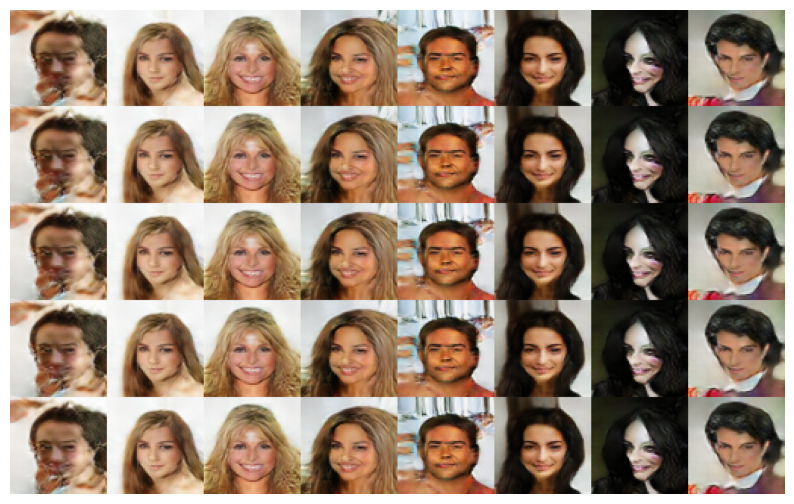

In [125]:
show_cont_generation("Attractive")

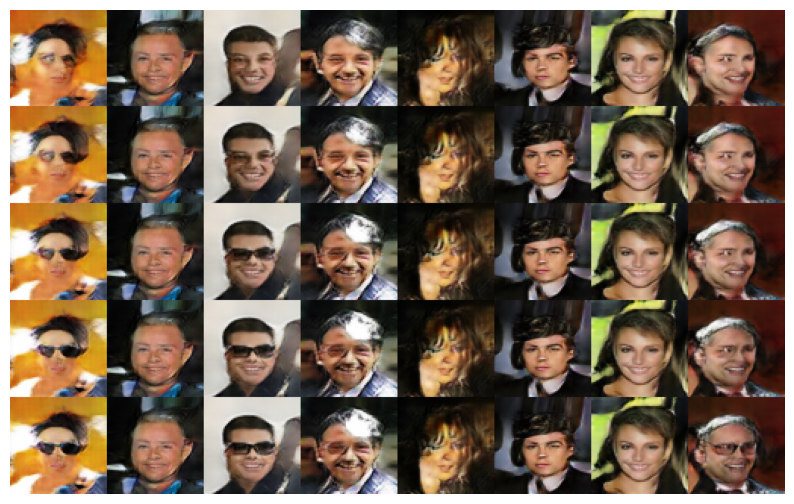

In [103]:
show_cont_generation("Eyeglasses")

**Create a gif from image labels**

In [103]:
def create_gif_label(images_file, gif_file, feature="Smiling"):
  fake_images = show_cont_generation(feature=feature, num_images=1, return_images=True)

  !rm -r $images_file
  !mkdir $images_file

  for i, image in enumerate(fake_images):
    image=tf.cast((image+1) * 127.5, tf.uint8)
    save_images = image.numpy().squeeze()
    save_images = Image.fromarray(save_images)
    save_images.save(f"{images_file}/image{i:02d}.png")

  create_gif(gif_file, images_file)


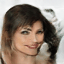

In [ ]:
feature = "Smiling"
images_file = f"Images{feature}"
gif_file = f"GAN_CelebA_ContGen_{feature}.gif"

create_gif_label(images_file, gif_file, feature)
embed.embed_file(gif_file)


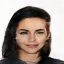

In [114]:
feature = "Male"
images_file = f"Images{feature}"
gif_file = f"GAN_CelebA_ContGen_{feature}.gif"

create_gif_label(images_file, gif_file, feature)
embed.embed_file(gif_file)


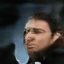

In [153]:
feature = "Eyeglasses"
images_file = f"Images{feature}"
gif_file = f"GAN_CelebA_ContGen_{feature}.gif"

create_gif_label(images_file, gif_file, feature)
embed.embed_file(gif_file)